In [1]:
import gsd
import gsd.hoomd
import freud
import numpy as np 

We're looking at a gsd of 200 PTB7 10-mer

chemical formula: ($C_{41}H_{53}FO_{4}S_{4})_{n}$

<img src="https://cdn.shopify.com/s/files/1/0823/0287/files/PTB7-structure.png" alt="Drawing" style="width: 200px;"/>

In [3]:
total_atoms = 41+53+1+4+4
print(total_atoms)
# we're doing united atom--so our total atoms is 
total_atoms-=53
print(total_atoms)

103
50


In [4]:
with gsd.hoomd.open(name='trajectory.gsd', mode='rb') as t:
    snap = t[-1]

In [5]:
# here are all the atom types in our system
snap.particles.types

['cc', 'cd', 'ca', 'os', 'c3', 'ss', 'c', 'o', 'f']

In [6]:
# here is the list of particles by typeid 
# e.g. ["cc", "cd", "cc"] --> [0,1,0]
print(len(snap.particles.typeid))
print(len(snap.particles.typeid)/(total_atoms*10))
snap.particles.typeid

100000
200.0


array([0, 1, 2, ..., 4, 2, 5], dtype=uint32)

In [7]:
atomtype = "f"
points = snap.particles.position[
    snap.particles.typeid == snap.particles.types.index(atomtype)
]

In [8]:
points.shape
# yep, we should have 2000 "f"s

(2000, 3)

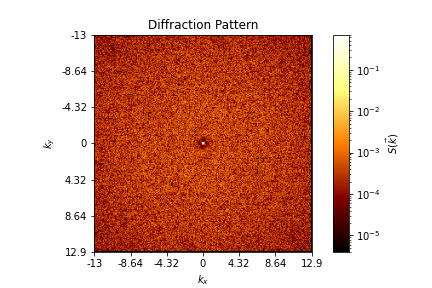

<Figure size 432x288 with 0 Axes>

In [9]:
box = freud.Box.from_box(snap.configuration.box)

dp = freud.diffraction.DiffractionPattern(
    grid_size=1024,
    output_size=1024
)
dp.compute((box, points), view_orientation=np.array([1,0,0,0]))